In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.style

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
path_excel="/content/drive/MyDrive/pm/compactiv.xlsx"
df1 = pd.read_excel(path_excel)

In [69]:
df1.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,NaN,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,NaN,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


###Problem 1.1 -
Define the problem and perform exploratory Data Analysis
- Problem definition - Check shape, Data types, statistical summary - Univariate analysis - Multivariate analysis - Use appropriate visualizations to identify the patterns and insights - Key meaningful observations on individual variables and the relationship between variables

In [ ]:
df1.shape

(8192, 22)

In [ ]:
print("The data has rows =",df1.shape[0])

The data has rows = 8192


In [ ]:
print("The data has columns =",df1.shape[1])

The data has columns = 22


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
lread,8192.0,1.955969e+01,53.353799,0.0,2.0,7.0,20.000,1845.00
lwrite,8192.0,1.310620e+01,29.891726,0.0,0.0,1.0,10.000,575.00
scall,8192.0,2.306318e+03,1633.617322,109.0,1012.0,2051.5,3317.250,12493.00
sread,8192.0,2.104800e+02,198.980146,6.0,86.0,166.0,279.000,5318.00
swrite,8192.0,1.500582e+02,160.478980,7.0,63.0,117.0,185.000,5456.00
fork,8192.0,1.884554e+00,2.479493,0.0,0.4,0.8,2.200,20.12
exec,8192.0,2.791998e+00,5.212456,0.0,0.2,1.2,2.800,59.56
rchar,8088.0,1.973857e+05,239837.493526,278.0,34091.5,125473.5,267828.750,2526649.00
wchar,8177.0,9.590299e+04,140841.707911,1498.0,22916.0,46619.0,106101.000,1801623.00
pgout,8192.0,2.285317e+00,5.307038,0.0,0.0,0.0,2.400,81.44


<Axes: xlabel='lread'>

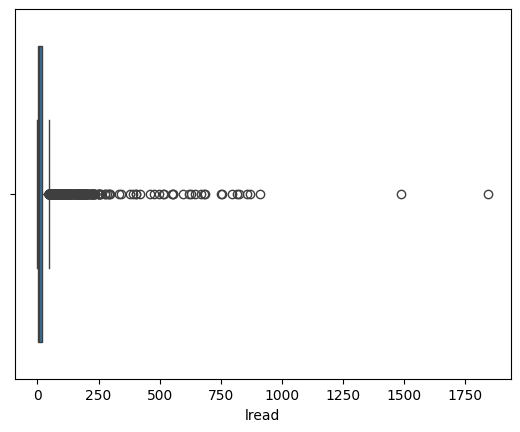

In [ ]:
sns.boxplot(data=df1, x='lread')

<Axes: xlabel='lwrite'>

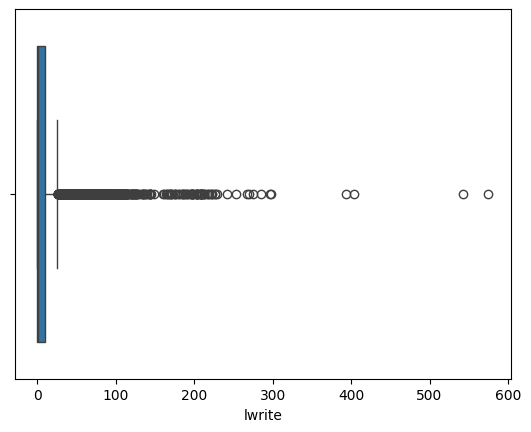

In [ ]:
sns.boxplot(data=df1, x='lwrite')

<Axes: xlabel='scall'>

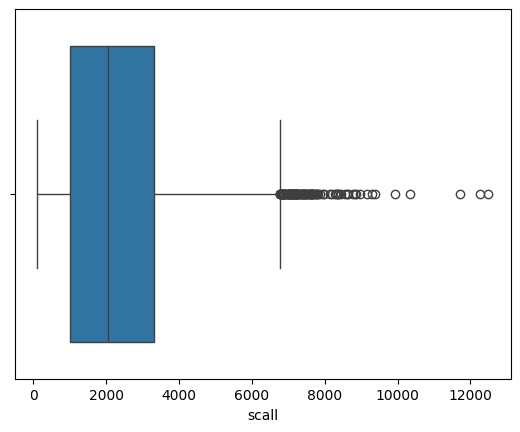

In [ ]:
sns.boxplot(data=df1, x='scall')

<Axes: xlabel='sread'>

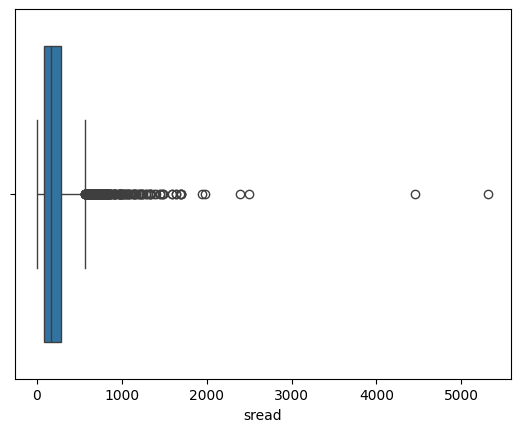

In [ ]:
sns.boxplot(data=df1, x='sread')

<Axes: xlabel='swrite'>

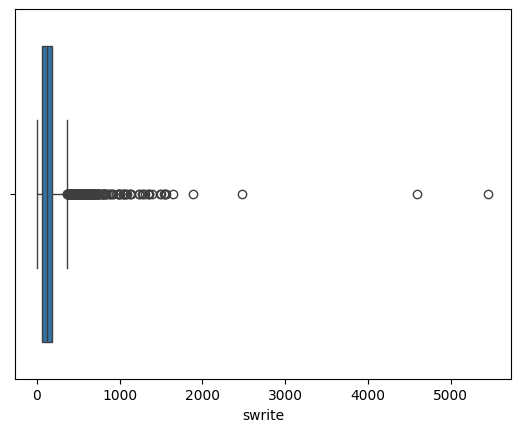

In [ ]:
sns.boxplot(data=df1, x='swrite')

<Axes: xlabel='fork'>

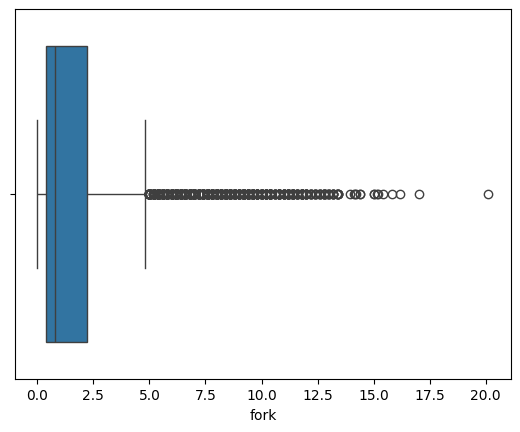

In [ ]:
sns.boxplot(data=df1, x='fork')

<Axes: xlabel='exec'>

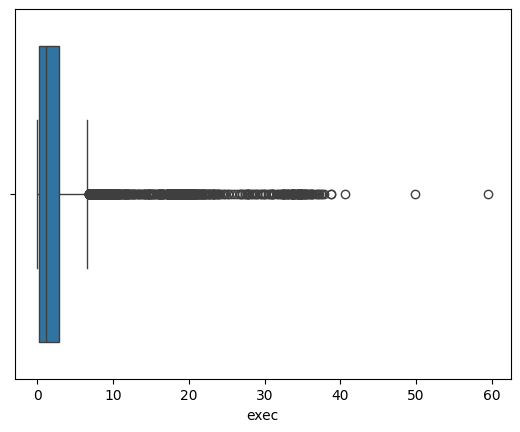

In [ ]:
sns.boxplot(data=df1, x='exec')

<Axes: xlabel='rchar'>

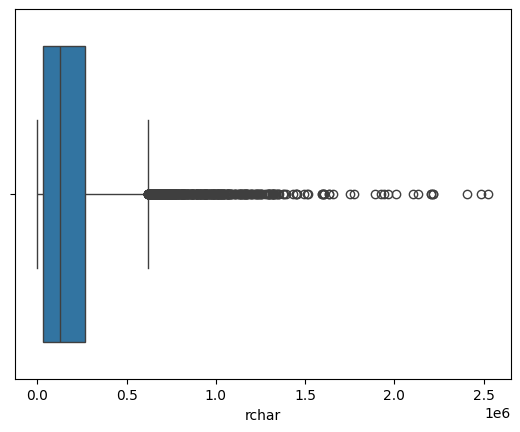

In [ ]:
sns.boxplot(data=df1, x='rchar')

<Axes: xlabel='wchar'>

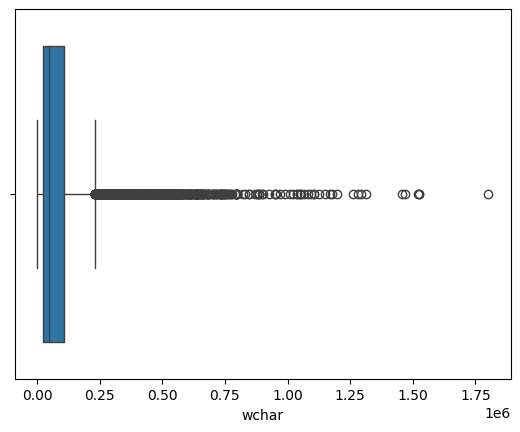

In [ ]:
sns.boxplot(data=df1, x='wchar')

<Axes: xlabel='pgout'>

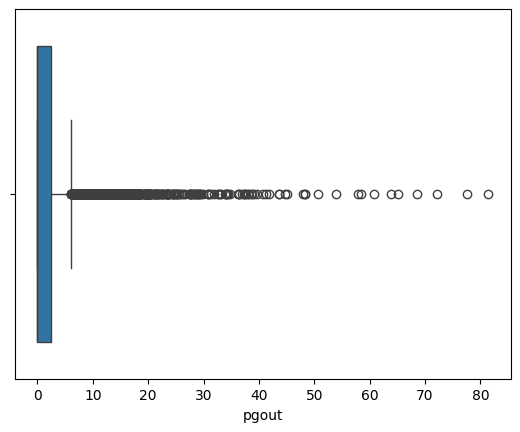

In [ ]:
sns.boxplot(data=df1, x='pgout')

<Axes: xlabel='ppgout'>

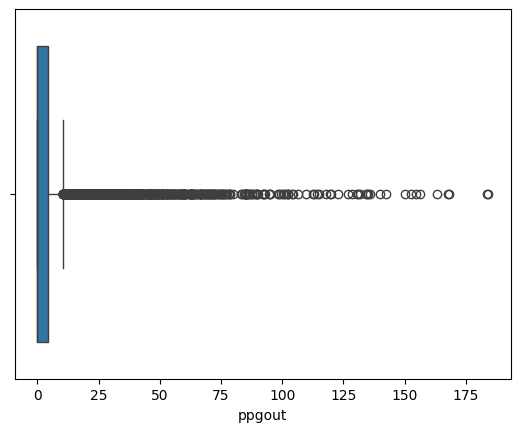

In [ ]:
sns.boxplot(data=df1, x='ppgout')

<Axes: xlabel='pgfree'>

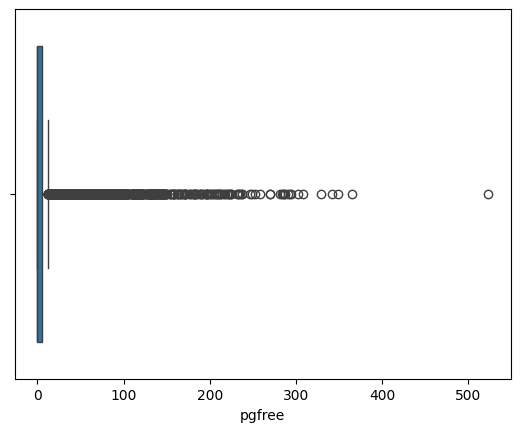

In [ ]:
sns.boxplot(data=df1, x='pgfree')

<Axes: xlabel='pgscan'>

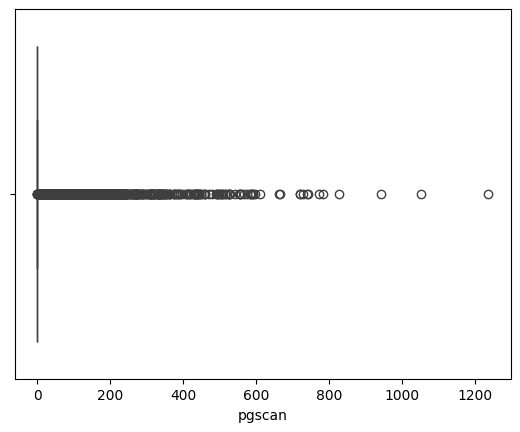

In [ ]:
sns.boxplot(data=df1, x='pgscan')

<Axes: xlabel='atch'>

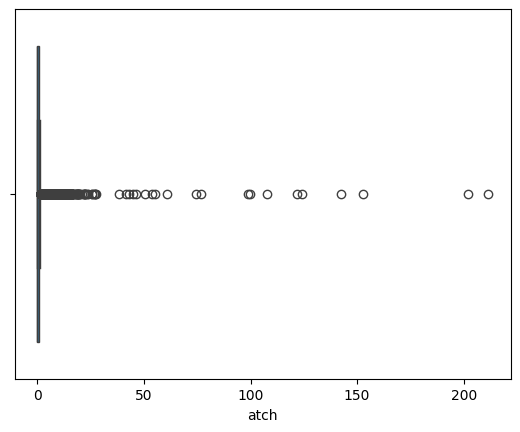

In [ ]:
sns.boxplot(data=df1, x='atch')

<Axes: xlabel='pgin'>

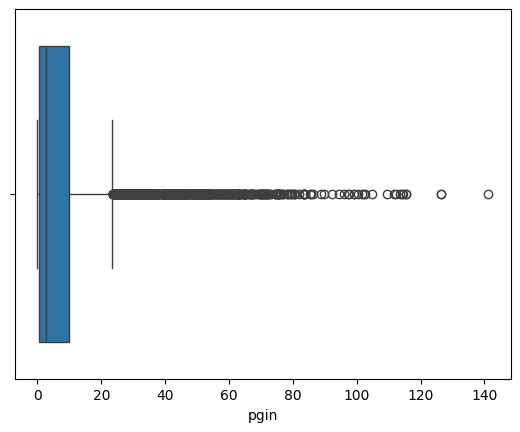

In [ ]:
sns.boxplot(data=df1, x='pgin')

<Axes: xlabel='ppgin'>

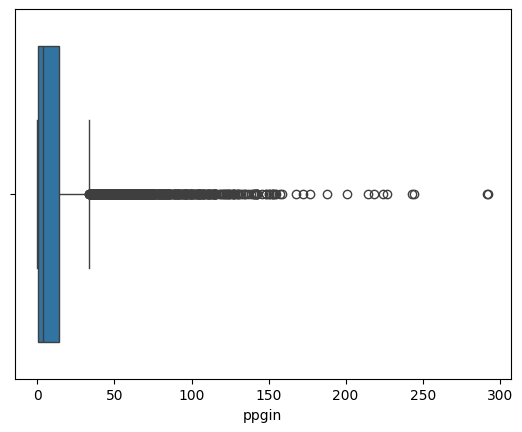

In [ ]:
sns.boxplot(data=df1, x='ppgin')

<Axes: xlabel='pflt'>

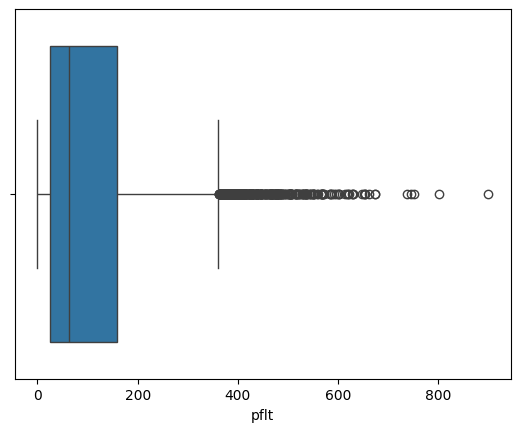

In [ ]:
sns.boxplot(data=df1, x='pflt')

<Axes: xlabel='vflt'>

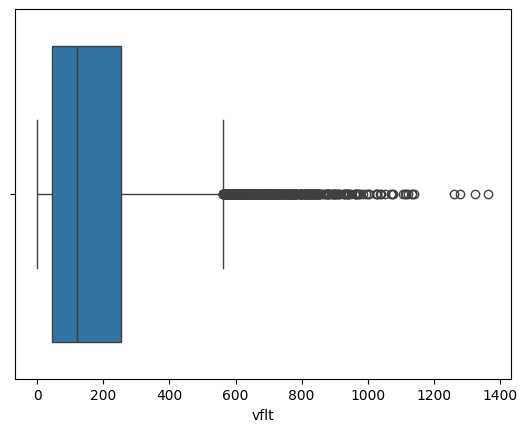

In [ ]:
sns.boxplot(data=df1, x='vflt')

<Axes: xlabel='freemem'>

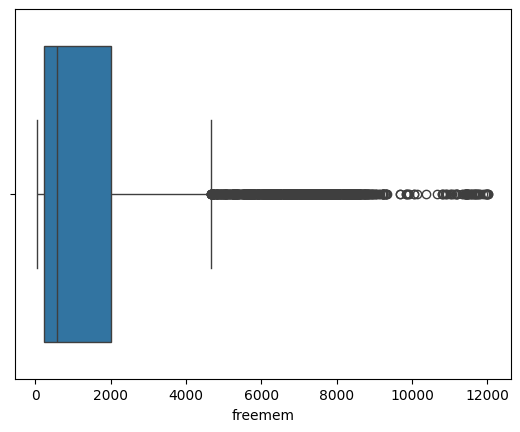

In [ ]:
sns.boxplot(data=df1, x='freemem')

<Axes: xlabel='freeswap'>

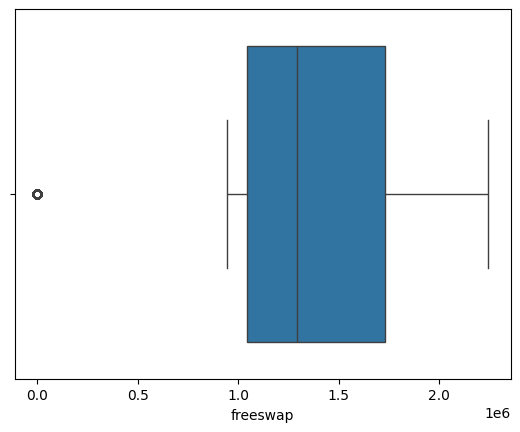

In [ ]:
sns.boxplot(data=df1, x='freeswap')

<Axes: xlabel='usr'>

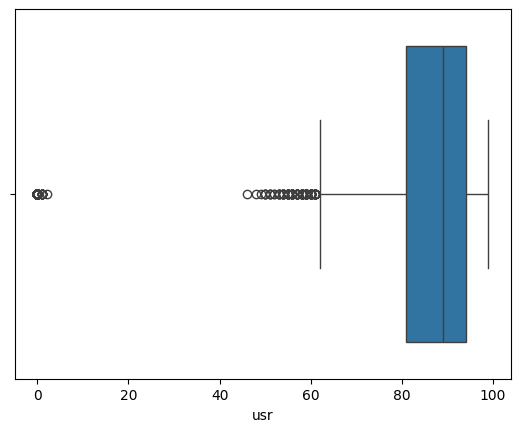

In [ ]:
sns.boxplot(data=df1, x='usr')

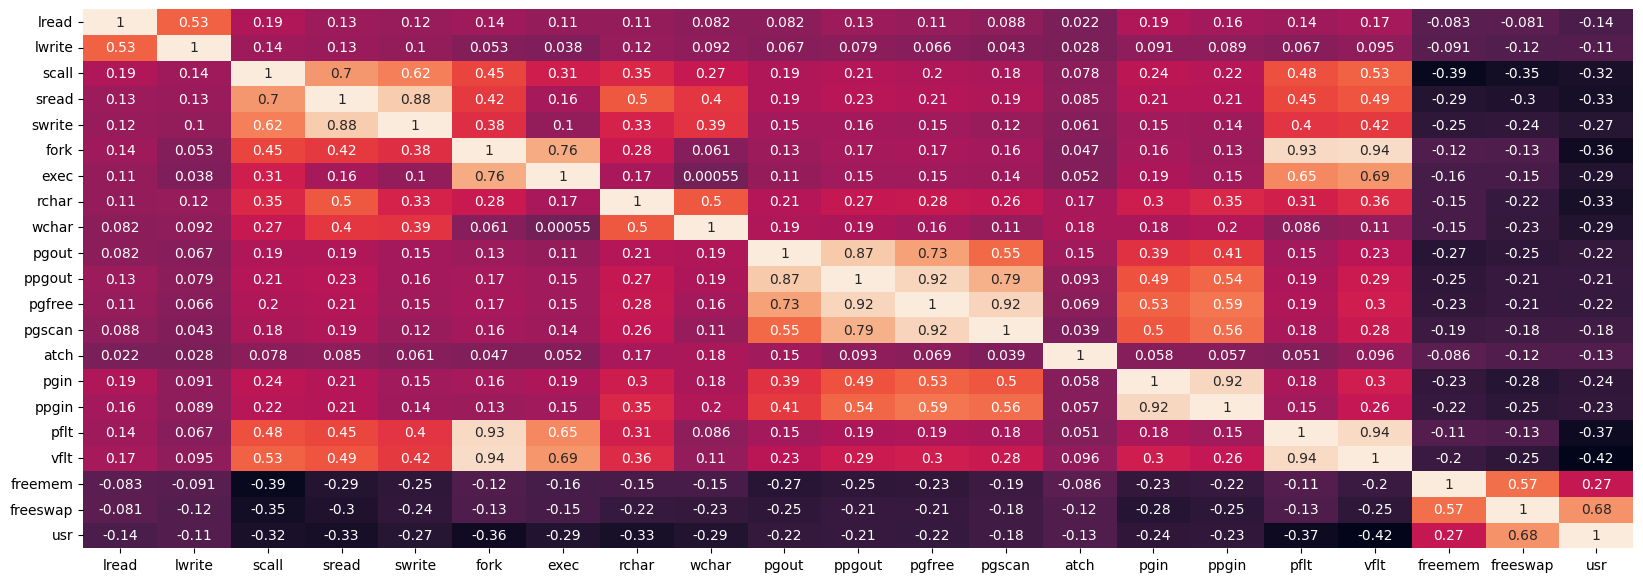

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(data=df1.drop('runqsz', axis=1).corr(), annot=True, cbar=False);

<Axes: xlabel='lread', ylabel='lwrite'>

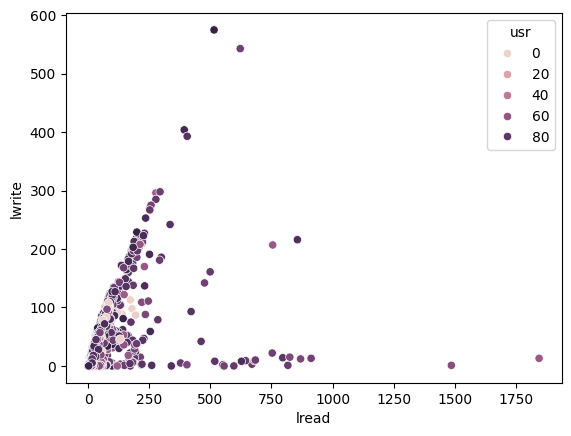

In [ ]:
sns.scatterplot(data=df1, x='lread',y='lwrite', hue='usr')

<Axes: xlabel='scall', ylabel='sread'>

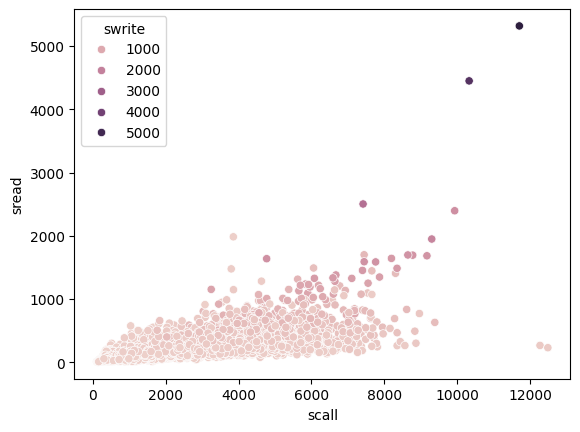

In [ ]:
sns.scatterplot(data=df1, x='scall',y='sread', hue='swrite')

<Axes: xlabel='exec', ylabel='fork'>

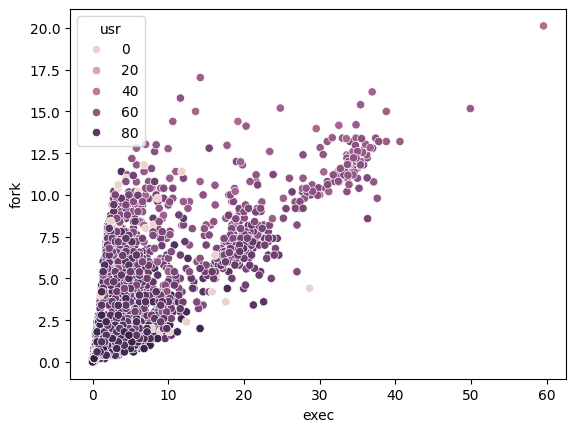

In [ ]:
sns.scatterplot(data=df1, x='exec',y='fork', hue='usr')

<Axes: xlabel='rchar', ylabel='wchar'>

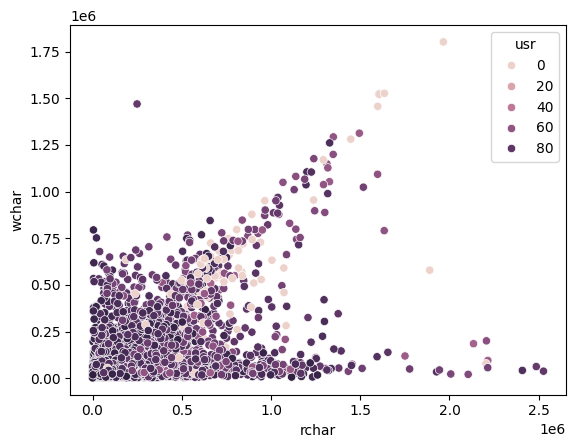

In [ ]:
sns.scatterplot(data=df1, x='rchar',y='wchar', hue='usr')

<Axes: xlabel='pgout', ylabel='ppgout'>

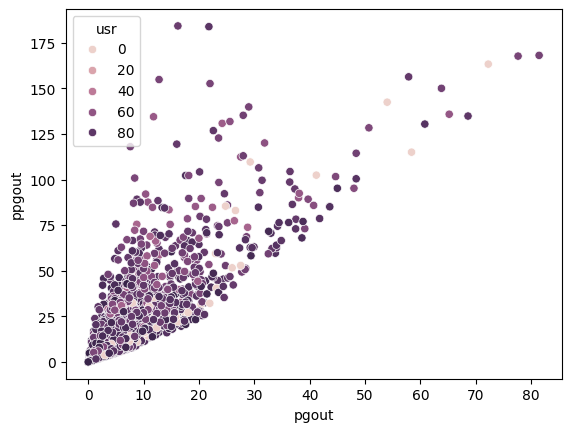

In [ ]:
sns.scatterplot(data=df1, x='pgout',y='ppgout', hue='usr')

<Axes: xlabel='pgfree', ylabel='pgscan'>

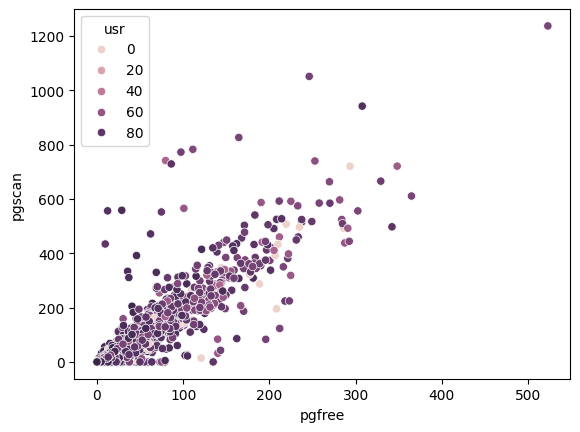

In [ ]:
sns.scatterplot(data=df1, x='pgfree',y='pgscan', hue='usr')

<Axes: xlabel='pgin', ylabel='ppgin'>

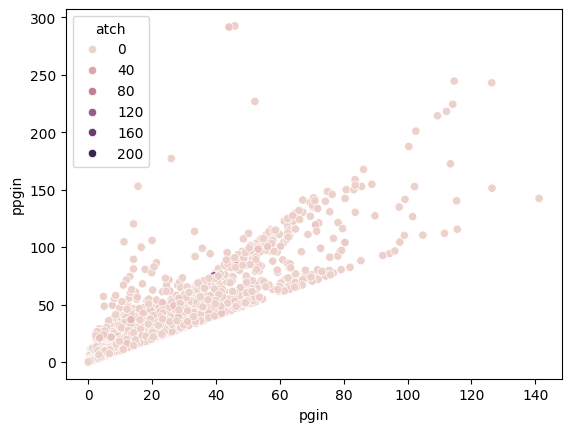

In [ ]:
sns.scatterplot(data=df1, x='pgin',y='ppgin', hue='atch')

<Axes: xlabel='pflt', ylabel='vflt'>

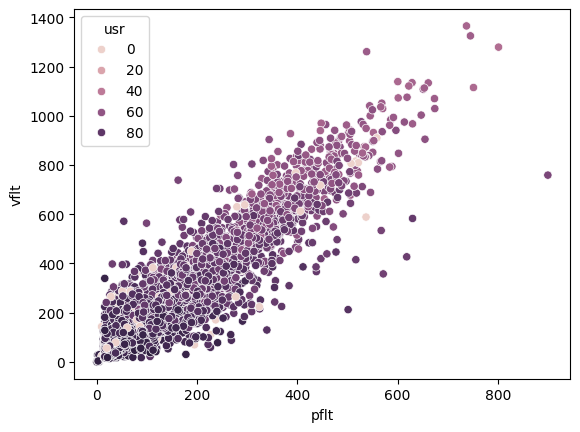

In [ ]:
sns.scatterplot(data=df1, x='pflt',y='vflt', hue='usr')

<Axes: xlabel='freemem', ylabel='freeswap'>

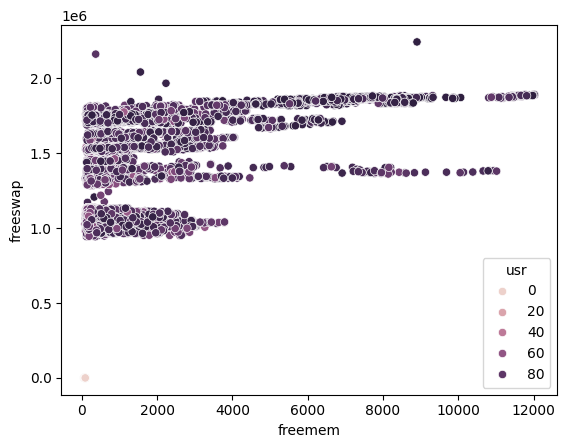

In [ ]:
sns.scatterplot(data=df1, x='freemem',y='freeswap', hue='usr')

###Key meaningful observations on individual variables and the relationship between variables

1.) Min lread is 0, median is 7and max is 1845.

2.) Min lwrite is 0, median is 1 and max is 575.

3.) Min scall is 109, median is 2051.5 and max is 12493.

4.) Min sread is 6, median is 166 and max is 5318.

5.) Min swrite is 7, median is 117 and max is 5456.

6.) Min fork is 0, median is 0.4 and max is 20.12.

7.) Min exec is 0, median is 1.2 and max is 59.56.

8.) Min rchar is 278, median is 125473.5 and max is 2526649.

9.) Min wchar is 1498, median is 44619 and max is 1801623.

10.) Min pgout is 0, median is also 0 and max is 81.44.

11.) Min ppgout is 0, median is also 0 and  max is 184.20.

12.) Min pgfree is 0, median is also 0 and max is 523.

13.) Min pgscan is 0, median is also 0 and max is 1237.

14.) Min atch is 0, median is also 0 and max is 211.58.

15.) Min pgin is 0, median is 2.8 and max is 141.20.

16.) Min ppgin is 0, median is 3.8 and max is 292.61.

17.) Min pflt is 0, median is 63.8 and max is 899.80.

18.) Min vflt is 0, median is 120.4 and max is 1365.

19.) Min freemem is 55, median is 579 and max is 1365.

20.) Min freeswap is 2 , median is 1289289.5 and max is 2243187.

21.) Min usr is 0, median is 89 and max is 99.

22.) There is 0.88 corelation between sread and swrite.

23.) There is 0.76 corelation between fork and exec.

24.) There is 0.93 corelation between fork and pflt.

25.) There is 094 corelation between fork and vflt.

26.) There is 0.87 corelation between pgout and ppgout.

27.) There is 0.92 corelation between pgfree and ppgout.

28.)There is 0.92 corelation between pgfree and pgscan.

29.) There is 0.92 corelation between pgin and pgpin.

30.) There is 0.94 corelation between pflt and vflt.

###Problem 1.2 -
Data Pre-processing
Prepare the data for modelling: - Missing Value Treatment (if needed) - Outlier Detection (treat, if needed) - Feature Engineering - Encode the data - Train-test split

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [ ]:
#checking unique values
df1['runqsz'].nunique()

2

In [ ]:
#checking null values
df1.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [70]:
#checking and treating null values
for column in df1.columns:
    if df1[column].dtype != 'object':
        mean = df1[column].mean()
        df1[column] = df1[column].fillna(mean)

df1.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [71]:
#checking and treating outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [72]:
for column in df1.drop('runqsz', axis=1).columns:
    lr,ur=remove_outlier(df1[column])
    df1[column]=np.where(df1[column]>ur,ur,df1[column])
    df1[column]=np.where(df1[column]<lr,lr,df1[column])

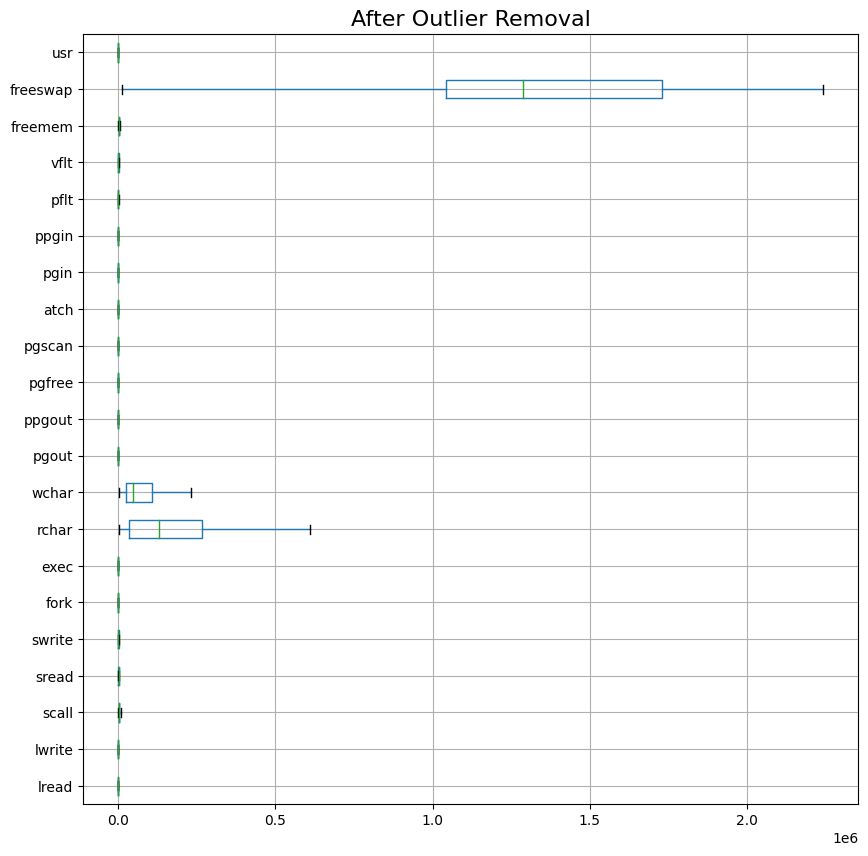

In [73]:
#checking to see if all outliers are removed
plt.figure(figsize=(10,10))
df1.boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [76]:
#to encode data
df1 = pd.get_dummies(df1, columns=['runqsz_Not_CPU_Bound'],drop_first=True)

In [77]:
df1.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,runqsz_Not_CPU_Bound_True
0,1.0,0.0,2147.0,79.0,68.0,0.2,0.2,40671.000000,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,4659.125,1730946.0,95.0,False
1,0.0,0.0,170.0,18.0,21.0,0.2,0.2,448.000000,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,4659.125,1869002.0,97.0,True
2,15.0,3.0,2162.0,159.0,119.0,2.0,2.4,197385.728363,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,702.000,1021237.0,87.0,True
3,0.0,0.0,160.0,12.0,16.0,0.2,0.2,197385.728363,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,4659.125,1863704.0,98.0,True
4,5.0,1.0,330.0,39.0,38.0,0.4,0.4,197385.728363,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,633.000,1760253.0,90.0,True


In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   lread                      8192 non-null   float64
 1   lwrite                     8192 non-null   float64
 2   scall                      8192 non-null   float64
 3   sread                      8192 non-null   float64
 4   swrite                     8192 non-null   float64
 5   fork                       8192 non-null   float64
 6   exec                       8192 non-null   float64
 7   rchar                      8192 non-null   float64
 8   wchar                      8192 non-null   float64
 9   pgout                      8192 non-null   float64
 10  ppgout                     8192 non-null   float64
 11  pgfree                     8192 non-null   float64
 12  pgscan                     8192 non-null   float64
 13  atch                       8192 non-null   float

In [79]:
# Copy all the predictor variables into X dataframe
X = df1.drop('usr', axis=1)

# Copy target into the y dataframe.
y = df1[['usr']]

In [80]:
X[['runqsz_Not_CPU_Bound_True']] = X[['runqsz_Not_CPU_Bound_True']].astype(float)
X.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,runqsz_Not_CPU_Bound_True
0,1.0,0.0,2147.0,79.0,68.0,0.2,0.2,40671.000000,53995.0,0.0,...,0.0,0.0,0.0,1.6,2.6,16.00,26.40,4659.125,1730946.0,0.0
1,0.0,0.0,170.0,18.0,21.0,0.2,0.2,448.000000,8385.0,0.0,...,0.0,0.0,0.0,0.0,0.0,15.63,16.83,4659.125,1869002.0,1.0
2,15.0,3.0,2162.0,159.0,119.0,2.0,2.4,197385.728363,31950.0,0.0,...,0.0,0.0,1.2,6.0,9.4,150.20,220.20,702.000,1021237.0,1.0
3,0.0,0.0,160.0,12.0,16.0,0.2,0.2,197385.728363,8670.0,0.0,...,0.0,0.0,0.0,0.2,0.2,15.60,16.80,4659.125,1863704.0,1.0
4,5.0,1.0,330.0,39.0,38.0,0.4,0.4,197385.728363,12185.0,0.0,...,0.0,0.0,0.0,1.0,1.2,37.80,47.60,633.000,1760253.0,1.0


In [81]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(6144, 21) (2048, 21) (6144, 1) (2048, 1)


###Problem 1.3-
Model Building - Linear regression
- Apply linear Regression using Sklearn - Using Statsmodels Perform checks for significant variables using the appropriate method - Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare.

In [82]:
#applying Linear Regression
import statsmodels.api as sm

In [83]:
X_train=sm.add_constant(X_train)# This adds the constant term beta0 to the Simple Linear Regression.
X_test=sm.add_constant(X_test)

In [84]:
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1183.
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:33:14   Log-Likelihood:                -17869.
No. Observations:                6144   AIC:                         3.578e+04
Df Residuals:                    6123   BIC:                         3.592e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [85]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                        28.922509
lread                         5.329591
lwrite                        4.320862
scall                         2.960752
sread                         6.409323
swrite                        5.595076
fork                         13.006965
exec                          3.200037
rchar                         2.118063
wchar                         1.594694
pgout                        11.240263
ppgout                       29.300121
pgfree                       16.538930
pgscan                             NaN
atch                          1.873710
pgin                         13.824371
ppgin                        13.986611
pflt                         11.958441
vflt                         15.570790
freemem                       1.958337
freeswap                      1.837574
runqsz_Not_CPU_Bound_True     1.156772
dtype: float64



/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [86]:
#dropping lread
X_train2 = X_train.drop(["lread"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.793 
Adjusted R-squared: 0.792


In [87]:
X_train3 = X_train.drop(["sread"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train3)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.794 
Adjusted R-squared: 0.794


In [88]:
X_train4 = X_train.drop(["swrite"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train4)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.794 
Adjusted R-squared: 0.793


In [89]:
X_train5 = X_train.drop(["fork"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train5)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.794 
Adjusted R-squared: 0.794


In [90]:
X_train6 = X_train.drop(["pgout"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train6)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.794 
Adjusted R-squared: 0.793


In [91]:
X_train7 = X_train.drop(["ppgout"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train7)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.794 
Adjusted R-squared: 0.794


In [92]:
X_train8 = X_train.drop(["pgfree"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train8)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.794 
Adjusted R-squared: 0.794


In [93]:
X_train9 = X_train.drop(["pgin"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train9)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.794 
Adjusted R-squared: 0.794


In [94]:
X_train10 = X_train.drop(["ppgin"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train10)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.794 
Adjusted R-squared: 0.793


In [95]:
X_train11 = X_train.drop(["pflt"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train11)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.784 
Adjusted R-squared: 0.783


In [96]:
X_train12 = X_train.drop(["vflt"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train12)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.794 
Adjusted R-squared: 0.793


In [97]:
#dropping lread
X_train = X_train.drop(["lread"], axis=1)

In [98]:
#running regression model again
olsmod_2 = sm.OLS(y_train, X_train)
olsres_2 = olsmod_2.fit()
print(olsres_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1232.
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:33:34   Log-Likelihood:                -17896.
No. Observations:                6144   AIC:                         3.583e+04
Df Residuals:                    6124   BIC:                         3.597e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [99]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                        28.880572
lwrite                        1.058997
scall                         2.947858
sread                         6.399659
swrite                        5.591842
fork                         12.993778
exec                          3.187060
rchar                         2.118010
wchar                         1.592587
pgout                        11.235167
ppgout                       29.297105
pgfree                       16.538247
pgscan                             NaN
atch                          1.873263
pgin                         13.814378
ppgin                        13.894348
pflt                         11.922143
vflt                         15.528004
freemem                       1.957950
freeswap                      1.832773
runqsz_Not_CPU_Bound_True     1.145494
dtype: float64



/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [100]:
X_train13 = X_train.drop(["sread"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train13)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.793 
Adjusted R-squared: 0.792


In [101]:
X_train14 = X_train.drop(["swrite"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train14)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.792 
Adjusted R-squared: 0.791


In [102]:
X_train15 = X_train.drop(["fork"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train15)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.793 
Adjusted R-squared: 0.792


In [103]:
X_train16 = X_train.drop(["pgout"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train16)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.792 
Adjusted R-squared: 0.791


In [104]:
X_train17 = X_train.drop(["ppgout"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train17)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.793 
Adjusted R-squared: 0.792


In [105]:
X_train18 = X_train.drop(["pgfree"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train18)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.793 
Adjusted R-squared: 0.792


In [106]:
X_train19 = X_train.drop(["pgin"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train19)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.793 
Adjusted R-squared: 0.792


In [107]:
X_train20 = X_train.drop(["ppgin"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train20)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.792 
Adjusted R-squared: 0.791


In [108]:
X_train21 = X_train.drop(["pflt"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train21)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.782 
Adjusted R-squared: 0.781


In [109]:
X_train22 = X_train.drop(["vflt"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train22)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.792 
Adjusted R-squared: 0.791


In [110]:
#removing sread
X_train = X_train.drop(["sread"], axis=1)

In [111]:
#running regression model again
olsmod_3 = sm.OLS(y_train, X_train)
olsres_3 = olsmod_3.fit()
print(olsres_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1300.
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:33:53   Log-Likelihood:                -17897.
No. Observations:                6144   AIC:                         3.583e+04
Df Residuals:                    6125   BIC:                         3.596e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series3 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const                        28.838320
lwrite                        1.058315
scall                         2.702948
swrite                        3.189446
fork                         12.963165
exec                          3.181081
rchar                         1.724126
wchar                         1.581508
pgout                        11.234855
ppgout                       29.297046
pgfree                       16.537774
pgscan                             NaN
atch                          1.871378
pgin                         13.813532
ppgin                        13.892260
pflt                         11.921778
vflt                         15.430628
freemem                       1.957392
freeswap                      1.823164
runqsz_Not_CPU_Bound_True     1.145464
dtype: float64



/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [113]:
X_train23 = X_train.drop(["fork"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train23)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.793 
Adjusted R-squared: 0.792


In [114]:
X_train24 = X_train.drop(["pgout"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train24)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.792 
Adjusted R-squared: 0.791


In [115]:
X_train25 = X_train.drop(["ppgout"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train25)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.793 
Adjusted R-squared: 0.792


In [116]:
X_train26 = X_train.drop(["pgfree"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train26)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.793 
Adjusted R-squared: 0.792


In [117]:
X_train27 = X_train.drop(["pgin"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train27)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.793 
Adjusted R-squared: 0.792


In [118]:
X_train28 = X_train.drop(["ppgin"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train28)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.792 
Adjusted R-squared: 0.791


In [119]:
X_train29 = X_train.drop(["pflt"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train29)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.782 
Adjusted R-squared: 0.781


In [120]:
X_train30 = X_train.drop(["vflt"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train30)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.792 
Adjusted R-squared: 0.791


In [121]:
#removing fork
X_train = X_train.drop(["fork"], axis=1)

In [122]:
#running regression model again
olsmod_4 = sm.OLS(y_train, X_train)
olsres_4 = olsmod_4.fit()
print(olsres_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1377.
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:34:11   Log-Likelihood:                -17897.
No. Observations:                6144   AIC:                         3.583e+04
Df Residuals:                    6126   BIC:                         3.595e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [123]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series4 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series4))

VIF values: 

const                        28.449612
lwrite                        1.054726
scall                         2.644870
swrite                        3.069172
exec                          2.911716
rchar                         1.722206
wchar                         1.581480
pgout                        11.232749
ppgout                       29.280505
pgfree                       16.535889
pgscan                             NaN
atch                          1.867072
pgin                         13.800771
ppgin                        13.875279
pflt                         10.155254
vflt                         11.995167
freemem                       1.957392
freeswap                      1.801019
runqsz_Not_CPU_Bound_True     1.145307
dtype: float64



/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [124]:
X_train31 = X_train.drop(["pgout"], axis=1)
olsmod_4 = sm.OLS(y_train, X_train31)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)

R-squared: 0.792 
Adjusted R-squared: 0.791


In [125]:
#removing pgout
X_train = X_train.drop(["pgout"], axis=1)

In [126]:
#running regression model again
olsmod_5 = sm.OLS(y_train, X_train)
olsres_5 = olsmod_5.fit()
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     1457.
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:34:19   Log-Likelihood:                -17908.
No. Observations:                6144   AIC:                         3.585e+04
Df Residuals:                    6127   BIC:                         3.596e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [127]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series5 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series5))

VIF values: 

const                        28.332573
lwrite                        1.054717
scall                         2.644127
swrite                        3.067500
exec                          2.909075
rchar                         1.721507
wchar                         1.581212
ppgout                       16.712590
pgfree                       16.212277
pgscan                             NaN
atch                          1.783917
pgin                         13.760748
ppgin                        13.820524
pflt                         10.143777
vflt                         11.988101
freemem                       1.949838
freeswap                      1.799220
runqsz_Not_CPU_Bound_True     1.144116
dtype: float64



/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [128]:
X_train32 = X_train.drop(["ppgout"], axis=1)
olsmod_5 = sm.OLS(y_train, X_train32)
olsres_5 = olsmod_5.fit()
print(
    "R-squared:",
    np.round(olsres_5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_5.rsquared_adj, 3),
)

R-squared: 0.791 
Adjusted R-squared: 0.791


In [129]:
#removing ppgout
X_train = X_train.drop(["ppgout"], axis=1)

In [130]:
#running regression model again
olsmod_6 = sm.OLS(y_train, X_train)
olsres_6 = olsmod_6.fit()
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     1548.
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:34:25   Log-Likelihood:                -17918.
No. Observations:                6144   AIC:                         3.587e+04
Df Residuals:                    6128   BIC:                         3.598e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [131]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series6 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series6))

VIF values: 

const                        28.265356
lwrite                        1.054702
scall                         2.641772
swrite                        3.067246
exec                          2.908671
rchar                         1.721054
wchar                         1.573521
pgfree                        1.947534
pgscan                             NaN
atch                          1.735425
pgin                         13.759230
ppgin                        13.809172
pflt                         10.141474
vflt                         11.987282
freemem                       1.949456
freeswap                      1.798344
runqsz_Not_CPU_Bound_True     1.141850
dtype: float64



/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [132]:
X_train33 = X_train.drop(["pgin"], axis=1)
olsmod_6 = sm.OLS(y_train, X_train33)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.791 
Adjusted R-squared: 0.791


In [133]:
#removing pgin
X_train = X_train.drop(["pgin"], axis=1)

In [134]:
#running regression model again
olsmod_7 = sm.OLS(y_train, X_train)
olsres_7 = olsmod_7.fit()
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     1548.
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:34:32   Log-Likelihood:                -17918.
No. Observations:                6144   AIC:                         3.587e+04
Df Residuals:                    6128   BIC:                         3.598e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [135]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series7 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series7))

VIF values: 

const                        28.063514
lwrite                        1.053627
scall                         2.640793
swrite                        3.067245
exec                          2.906586
rchar                         1.709491
wchar                         1.572606
pgfree                        1.945288
pgscan                             NaN
atch                          1.734921
ppgin                         1.635845
pflt                         10.072268
vflt                         11.857693
freemem                       1.949451
freeswap                      1.788934
runqsz_Not_CPU_Bound_True     1.141843
dtype: float64



/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [136]:
X_train34 = X_train.drop(["pflt"], axis=1)
olsmod_7 = sm.OLS(y_train, X_train34)
olsres_7 = olsmod_7.fit()
print(
    "R-squared:",
    np.round(olsres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_7.rsquared_adj, 3),
)

R-squared: 0.778 
Adjusted R-squared: 0.777


In [137]:
X_train35 = X_train.drop(["vflt"], axis=1)
olsmod_7 = sm.OLS(y_train, X_train35)
olsres_7 = olsmod_7.fit()
print(
    "R-squared:",
    np.round(olsres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_7.rsquared_adj, 3),
)

R-squared: 0.79 
Adjusted R-squared: 0.79


In [138]:
#removing vflt
X_train = X_train.drop(["vflt"], axis=1)

In [139]:
#running regression model again
olsmod_8 = sm.OLS(y_train, X_train)
olsres_8 = olsmod_8.fit()
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     1548.
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:34:43   Log-Likelihood:                -17918.
No. Observations:                6144   AIC:                         3.587e+04
Df Residuals:                    6128   BIC:                         3.598e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [140]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series8 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series8))

VIF values: 

const                        27.862964
lwrite                        1.052304
scall                         2.640053
swrite                        2.984758
exec                          2.788347
rchar                         1.689758
wchar                         1.537828
pgfree                        1.937262
pgscan                             NaN
atch                          1.729346
ppgin                         1.513597
pflt                          3.228292
freemem                       1.947225
freeswap                      1.748538
runqsz_Not_CPU_Bound_True     1.141805
dtype: float64



/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


###Testing the Assumptions of Linear Regression
##### For Linear Regression, we need to check if the following assumptions hold:-

1. Linearity
2. Independence
3. Homoscedasticity
4. Normality of error terms
5. No strong Multicollinearity

#### Linearity and Independence of predictors

In [141]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_6.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_8.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,94.0,89.789447,4.251987
1,96.0,88.075507,7.948126
2,77.0,77.781508,-1.052438
3,93.0,97.869169,-4.884189
4,86.0,86.010659,0.381213


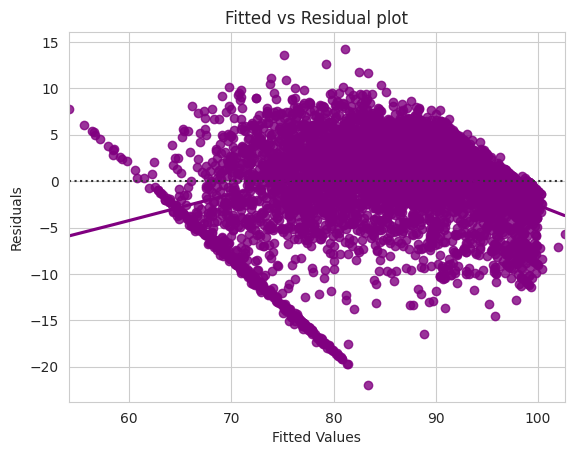

In [142]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

##### No pattern in the data thus the assumption of linearity and independence of predictors satisfied

#### Test for Normality

In [143]:
from scipy import stats
stats.shapiro(df_pred["Residuals"])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9429666996002197, pvalue=1.4433374182545616e-43)

##### * Since p-value < 0.05, the residuals are not normal as per shapiro test.

#### Test for Homoscedasticity

In [144]:
import statsmodels.stats.api as sms
sms.het_goldfeldquandt(df_pred["Residuals"], X_train)[1]

0.019072493798571233

In [145]:
olsres_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     1778.
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:35:37   Log-Likelihood:                -17929.
No. Observations:                6144   AIC:                         3.589e+04
Df Residuals:                    6130   BIC:                         3.598e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        83.8379      0.302    277.684      0.000      83.246      84.430
lwrite                       -0.0344      0.006     -5.442      0.000      -0.047      -0.022
scall                        -0.0007    5.8e-05    -12.196      0.000      -0.001      -0.001
swrite                       -0.0057      0.001     -5.582      0.000      -0.008      -0.004
exec                         -0.3645      0.047     -7.765      0.000      -0.457      -0.272
rchar                     -5.235e-06   4.25e-07    -12.308      0.000   -6.07e-06    -4.4e-06
wchar                     -4.713e-06   9.96e-07     -4.732      0.000   -6.67e-06   -2.76e-06
pgfree                       -0.1118      0.016     -6.973      0.000      -0.143      -0.080
pgscan                     1.048e-13   3.93e-16    266.692      0.000    1.04e-13    1.06e-13
atch                          0.3650      0.134      2.719      0.007       0.102       0.628
ppgin                        -0.0738      0.006    -11.665      0.000      -0.086      -0.061
pflt                         -0.0418      0.001    -41.510      0.000      -0.044      -0.040
freemem                      -0.0005   4.96e-05     -9.188      0.000      -0.001      -0.000
freeswap                   9.077e-06   1.81e-07     50.206      0.000    8.72e-06    9.43e-06
runqsz_Not_CPU_Bound_True     1.6711      0.122     13.654      0.000       1.431       1.911
==============================================================================
Omnibus:                     1083.654   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2186.338
Skew:                          -1.059   Prob(JB):                         0.00
Kurtosis:                       5.013   Cond. No.                     5.87e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.55e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

###Problem 1.4 -
Business Insights & Recommendations
- Comment on the Linear Regression equation from the final model and impact of relevant variables (atleast 2) as per the equation - Conclude with the key takeaways (actionable insights and recommendations) for the business

#### The model equation will be as follows:

In [ ]:
# Let us write the equation of linear regression
Equation = "usr ="
print(Equation, end=" ")
for i in range(len(X_train.columns)):
    if i == 0:
        print(olsres_8.params[i], "+", end=" ")
    elif i != len(X_train.columns) - 1:
        print(
            olsres_8.params[i],
            "* (",
            X_train.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_8.params[i], "* (", X_train.columns[i], ")")

usr = 83.83787842658171 + -0.03442389104975434 * ( lwrite ) +  -0.0007078304260178355 * ( scall ) +  -0.005696860159840357 * ( swrite ) +  -0.3645134716932681 * ( exec ) +  -5.234554921890233e-06 * ( rchar ) +  -4.7130153728022875e-06 * ( wchar ) +  -0.11182784876976265 * ( pgfree ) +  1.0480993884982981e-13 * ( pgscan ) +  0.3650008194370524 * ( atch ) +  -0.07377115324286754 * ( ppgin ) +  -0.04175157012545522 * ( pflt ) +  -0.000455813381373493 * ( freemem ) +  9.077047382328394e-06 * ( freeswap ) +  1.6711043332702478 * ( runqsz_Not_CPU_Bound_True )


### Observations

- 1 unit increase in the no.of  runqsz_Not_CPU_Bound_True lead to a 1.6 times increase in the usr.

- 1 unit increase in the no .of  atch lead to a 0.36 times increase in the usr.

- 1 unit increase in the no .of  exec lead to a -0.36 times decrease in the usr.

- 1 unit increase in the no .of  pgfree lead to a -0.11 times decrease in the usr.

####actionable insights and recommendations

- R-squared and Adj. R-squared is 0.790 which means less chances of error.

- Company should focus more on runqsz as it is the main factor in usr.

- Company should also focus on atch as it is second main factor is usr.

- Company should focus on exec as it decreases the value of usr significantly.

- Company should focus on pgfree as it also decreases the value of usr significantly.

#Problem 2.1 -
Define the problem and perform exploratory Data Analysis
- Problem definition - Check shape, Data types, statistical summary - Univariate analysis - Multivariate analysis - Use appropriate visualizations to identify the patterns and insights - Key meaningful observations on individual variables and the relationship between variables

In [ ]:
path_excel="/content/drive/MyDrive/pm/Contraceptive_method_dataset.xlsx"
df2= pd.read_excel(path_excel)

In [ ]:
df2.head()


,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [ ]:
#shape
df2.shape

(1473, 10)

In [ ]:
print("The no. of rows =",df2.shape[0])

The no. of rows = 1473


In [ ]:
print("The no. of columns =",df2.shape[1])

The no. of columns = 10


In [ ]:
#data types
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [ ]:
#statistical summary
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Wife_age,1402.0,32.606277,8.274927,16.0,26.0,32.0,39.0,49.0
No_of_children_born,1452.0,3.254132,2.365212,0.0,1.0,3.0,4.0,16.0
Husband_Occupation,1473.0,2.137814,0.864857,1.0,1.0,2.0,3.0,4.0


<Axes: xlabel='Wife_age'>

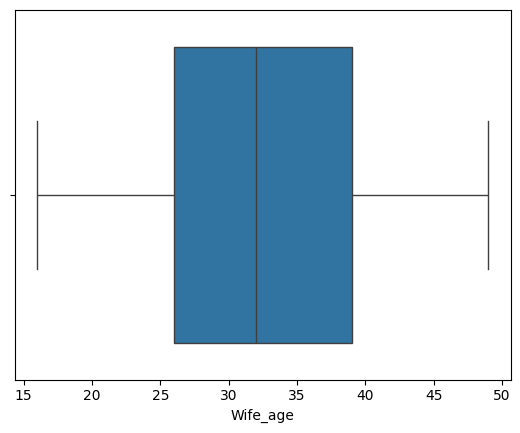

In [ ]:
 #Univariate analysis
 sns.boxplot(data=df2,x='Wife_age')

<Axes: xlabel='No_of_children_born'>

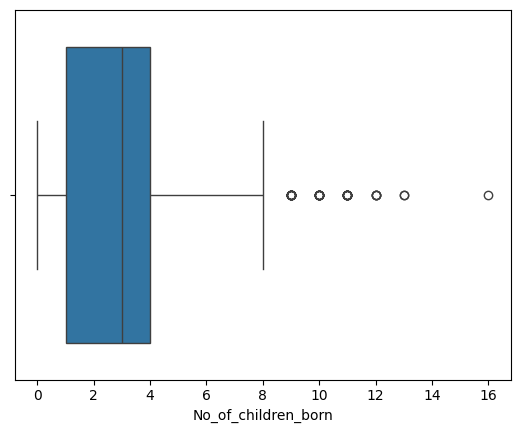

In [ ]:
 sns.boxplot(data=df2,x='No_of_children_born')

<Axes: xlabel='Husband_Occupation'>

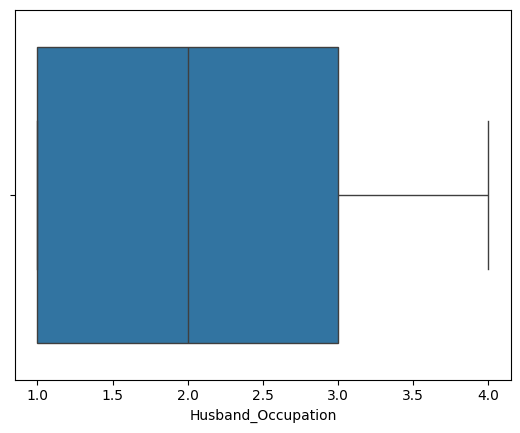

In [ ]:
sns.boxplot(data=df2, x='Husband_Occupation')

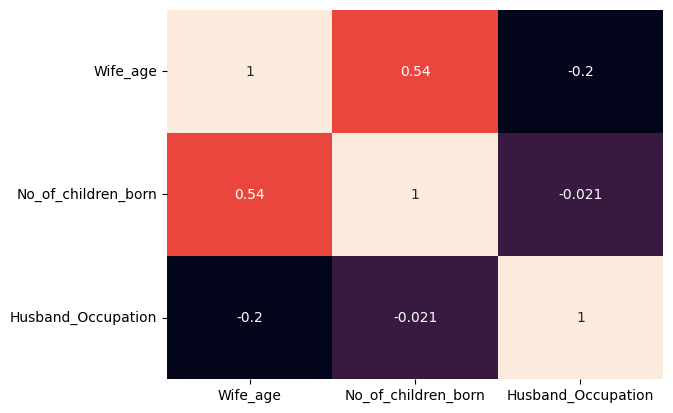

In [ ]:
#Multivariate analysis
sns.heatmap(data=df2[['Wife_age','No_of_children_born','Husband_Occupation']].corr(),annot=True, cbar=False);

####Key meaningful observations on individual variables and the relationship between variables

1.) Min wife_age is 16, median is 32 and max is 49.

2.) Min no. of children born is 0, median is 3 and max is 16.

3.) Min husband occupation is 1, median is 2 and max is 4.

4.) There is no corelation between variables.

###Problem 2.2 -
Data Pre-processing
Prepare the data for modelling: - Missing value Treatment (if needed) - Outlier Detection(treat, if needed) - Feature Engineering (if needed) - Encode the data - Train-test split

In [ ]:
#Missing value Treatmen
df2.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [ ]:
for column in df2.columns:
    if df2[column].dtype != 'object':
        mean = df2[column].mean()
        df2[column] = df2[column].fillna(mean)

df2.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [ ]:
#outlier Treatment
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
## Check the lower range and upper range for the variable with zscore
lr,ur=remove_outlier(df2['No_of_children_born'])
print("lower range",lr, "and upper range", ur)

lower range -3.5 and upper range 8.5


In [ ]:
df2['No_of_children_born']=np.where(df2['No_of_children_born']>ur,ur,df2['No_of_children_born'])
df2['No_of_children_born']=np.where(df2['No_of_children_born']<lr,lr,df2['No_of_children_born'])

<Axes: xlabel='No_of_children_born'>

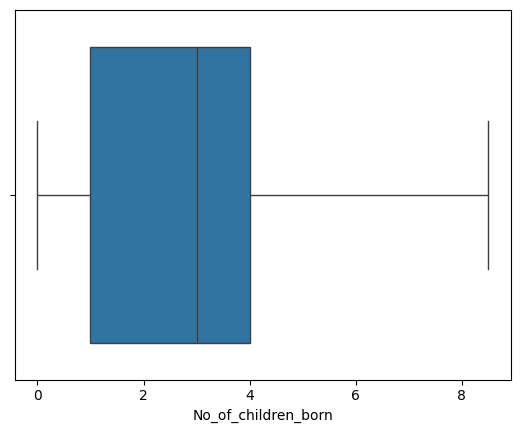

In [ ]:
sns.boxplot(data=df2, x='No_of_children_born')

In [ ]:
#feature engineering
for feature in df2.columns:
    if df2[feature].dtype == 'object':
        print(feature)
        print(df2[feature].value_counts())
        print('\n')


Wife_ education
Wife_ education
Tertiary      577
Secondary     410
Primary       334
Uneducated    152
Name: count, dtype: int64


Husband_education
Husband_education
Tertiary      899
Secondary     352
Primary       178
Uneducated     44
Name: count, dtype: int64


Wife_religion
Wife_religion
Scientology        1253
Non-Scientology     220
Name: count, dtype: int64


Wife_Working
Wife_Working
No     1104
Yes     369
Name: count, dtype: int64


Standard_of_living_index
Standard_of_living_index
Very High    684
High         431
Low          229
Very Low     129
Name: count, dtype: int64


Media_exposure 
Media_exposure 
Exposed        1364
Not-Exposed     109
Name: count, dtype: int64


Contraceptive_method_used
Contraceptive_method_used
Yes    844
No     629
Name: count, dtype: int64




In [ ]:
#data encoding
df2_dummy = pd.get_dummies(df2,drop_first=True).astype(float)
df2_dummy.head()

,Wife_age,No_of_children_born,Husband_Occupation,Wife_ education_Secondary,Wife_ education_Tertiary,Wife_ education_Uneducated,Husband_education_Secondary,Husband_education_Tertiary,Husband_education_Uneducated,Wife_religion_Scientology,Wife_Working_Yes,Standard_of_living_index_Low,Standard_of_living_index_Very High,Standard_of_living_index_Very Low,Media_exposure _Not-Exposed,Contraceptive_method_used_Yes
0,24.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,45.0,8.5,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,43.0,7.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,42.0,8.5,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36.0,8.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Copy all the predictor variables into X dataframe
X = df2_dummy.drop('Contraceptive_method_used_Yes', axis=1)

# Copy target into the y dataframe.
y = df2_dummy['Contraceptive_method_used_Yes']

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=df2_dummy['Contraceptive_method_used_Yes'])

In [ ]:
y_train.value_counts(1)

Contraceptive_method_used_Yes
1.0    0.57323
0.0    0.42677
Name: proportion, dtype: float64

In [ ]:
y_test.value_counts(1)

Contraceptive_method_used_Yes
1.0    0.572398
0.0    0.427602
Name: proportion, dtype: float64

###Problem 2.3 -
Model Building and Compare the Performance of the Models
- Build a Logistic Regression model - Build a Linear Discriminant Analysis model - Build a CART model - Prune the CART model by finding the best hyperparameters using GridSearch - Check the performance of the models across train and test set using different metrics - Compare the performance of all the models built and choose the best one with proper rationale

In [ ]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
#model = LogisticRegression(solver='liblinear',max_iter=100,verbose=True,n_jobs=2)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Predicting on Training and Test dataset

In [ ]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [ ]:
ytest_predict

array([1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 1.

### Getting the Predicted Classes and Probs

In [ ]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.198377,0.801623
1,0.884696,0.115304
2,0.977238,0.022762
3,0.340800,0.659200
4,0.292911,0.707089


## Model Evaluation

In [ ]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6905916585838991

# <font color='red'>LDA Model</font>

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import scale

In [ ]:
Y.value_counts(normalize=True)

Contraceptive_method_used_Yes
1.0    0.57298
0.0    0.42702
Name: proportion, dtype: float64

In [ ]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [ ]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (1031, 15)
Number of rows and columns of the training set for the dependent variable: (1031,)
Number of rows and columns of the test set for the independent variables: (442, 15)
Number of rows and columns of the test set for the dependent variable: (442,)


In [ ]:
X = df2_dummy.drop('Contraceptive_method_used_Yes',axis=1)
Y = df2_dummy.pop('Contraceptive_method_used_Yes')

##### Applying Standard Scaler to scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler
stand_scal = StandardScaler()
X_train = stand_scal.fit_transform(X_train)
X_test = stand_scal.transform (X_test)

In [ ]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

In [ ]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

### Training Data and Test Data Confusion Matrix Comparison

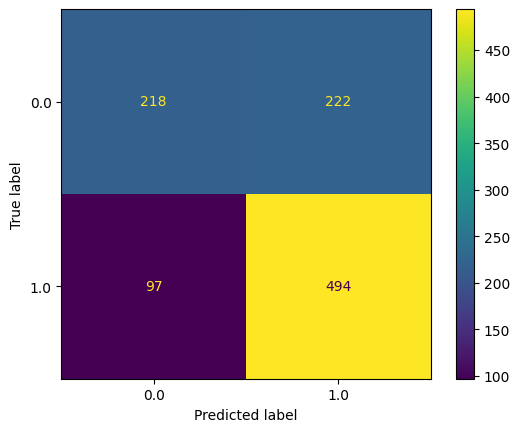

In [ ]:
## Confusion matrix on the training data
cm = confusion_matrix(Y_train, pred_class_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

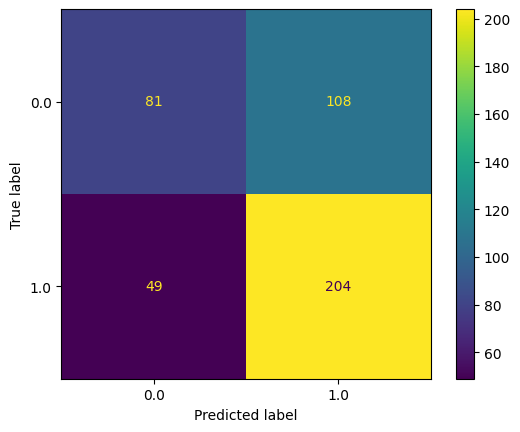

In [ ]:
## Confusion matrix on the training data
cm = confusion_matrix(Y_test, pred_class_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.69      0.50      0.58       440
         1.0       0.69      0.84      0.76       591

    accuracy                           0.69      1031
   macro avg       0.69      0.67      0.67      1031
weighted avg       0.69      0.69      0.68      1031
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.62      0.43      0.51       189
         1.0       0.65      0.81      0.72       253

    accuracy                           0.64       442
   macro avg       0.64      0.62      0.61       442
weighted avg       0.64      0.64      0.63       442
 



#for cart

### Splitting data into training and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

### Checking the dimensions of the training and test data

In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Obs',8083+3465)

X_train (1031, 15)
X_test (442, 15)
train_labels (1031,)
test_labels (442,)
Total Obs 11548


In [ ]:
train_labels.value_counts()

Contraceptive_method_used_Yes
1.0    595
0.0    436
Name: count, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier

### Building a Decision Tree Classifier

In [ ]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

In [ ]:
# Fit the model
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

In [ ]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model,
                                out_file=ld_Tree_File,
                                feature_names = list(X_train),
                                class_names = list(train_char_label))

ld_Tree_File.close()

In [ ]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                         Imp
Wife_age                            0.359544
No_of_children_born                 0.259416
Husband_Occupation                  0.068401
Wife_ education_Tertiary            0.053375
Wife_Working_Yes                    0.049540
Standard_of_living_index_Very High  0.033477
Husband_education_Secondary         0.030788
Wife_ education_Secondary           0.025717
Husband_education_Tertiary          0.025151
Wife_religion_Scientology           0.021186
Standard_of_living_index_Low        0.020144
Media_exposure _Not-Exposed         0.019981
Wife_ education_Uneducated          0.014284
Standard_of_living_index_Very Low   0.011899
Husband_education_Uneducated        0.007099


### Predicting Test Data

In [ ]:
y_predict = dt_model.predict(X_test)
y_predict_train = dt_model.predict(X_train)

In [ ]:
y_predict.shape

(442,)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(train_labels,y_predict_train))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       436
         1.0       1.00      0.98      0.99       595

    accuracy                           0.98      1031
   macro avg       0.98      0.99      0.98      1031
weighted avg       0.98      0.98      0.98      1031



In [ ]:
print(classification_report(test_labels,y_predict))

              precision    recall  f1-score   support

         0.0       0.64      0.67      0.65       193
         1.0       0.73      0.71      0.72       249

    accuracy                           0.69       442
   macro avg       0.69      0.69      0.69       442
weighted avg       0.69      0.69      0.69       442



# Regularising the Decision Tree

### Adding Tuning Parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [1,5,10,15,20],
              'min_samples_leaf':[1,5,10,15,20],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, train_labels)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 15, 20]},
             verbose=True)

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10, max_features='auto',
                       min_samples_leaf=5, random_state=1024)

In [ ]:
reg_dt_model = DecisionTreeClassifier( ccp_alpha=0.001,criterion='entropy', max_depth=10,
                       max_features='auto',
                           random_state=1024)
reg_dt_model.fit(X_train, train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=10,
                       max_features='auto', random_state=1024)

In [ ]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

### Variable Importance

In [ ]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                         Imp
No_of_children_born                 0.318317
Wife_age                            0.298290
Husband_Occupation                  0.069061
Wife_ education_Uneducated          0.067089
Wife_ education_Tertiary            0.044318
Standard_of_living_index_Very High  0.033417
Wife_religion_Scientology           0.030357
Standard_of_living_index_Very Low   0.027465
Media_exposure _Not-Exposed         0.026711
Wife_ education_Secondary           0.023224
Husband_education_Tertiary          0.022230
Wife_Working_Yes                    0.014075
Standard_of_living_index_Low        0.011535
Husband_education_Secondary         0.008543
Husband_education_Uneducated        0.005367


### Predicting on Training and Test dataset

In [ ]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [ ]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (1031,)
ytest_predict (442,)


### Getting the Predicted Classes

In [ ]:
ytest_predict

array([0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0.

In [ ]:
print(classification_report(train_labels,ytrain_predict ))

              precision    recall  f1-score   support

         0.0       0.84      0.63      0.72       436
         1.0       0.77      0.91      0.83       595

    accuracy                           0.79      1031
   macro avg       0.80      0.77      0.78      1031
weighted avg       0.80      0.79      0.79      1031



In [ ]:
print(classification_report(test_labels,ytest_predict ))

              precision    recall  f1-score   support

         0.0       0.71      0.51      0.60       193
         1.0       0.69      0.84      0.76       249

    accuracy                           0.70       442
   macro avg       0.70      0.68      0.68       442
weighted avg       0.70      0.70      0.69       442



### Getting the Predicted Probabilities

In [ ]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.55882353, 0.44117647],
       [1.        , 0.        ],
       [0.28571429, 0.71428571],
       [0.83333333, 0.16666667],
       [1.        , 0.        ],
       [0.28571429, 0.71428571],
       [0.28571429, 0.71428571],
       [0.4       , 0.6       ],
       [1.        , 0.        ],
       [0.375     , 0.625     ],
       [0.28571429, 0.71428571],
       [0.36363636, 0.63636364],
       [1.        , 0.        ],
       [0.36363636, 0.63636364],
       [0.1875    , 0.8125    ],
       [1.        , 0.        ],
       [0.22580645, 0.77419355],
       [0.23958333, 0.76041667],
       [1.        , 0.        ],
       [0.1875    , 0.8125    ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.36363636, 0.63636364],
       [0.22580645, 0.77419355],
       [1.        , 0.        ],
       [0.42857143, 0.57142857],
       [0.37209302, 0.62790698],
       [1.        , 0.        ],
       [0.37209302, 0.62790698],
       [0.

In [ ]:
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.558824,0.441176
1,1.000000,0.000000
2,0.285714,0.714286
3,0.833333,0.166667
4,1.000000,0.000000


## Confusion Matrix for the training data

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
confusion_matrix(train_labels, ytrain_predict)

array([[275, 161],
       [ 54, 541]])

In [ ]:
#Train Data Accuracy
reg_dt_model.score(X_train,train_labels)

0.7914645974781765

In [ ]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.84      0.63      0.72       436
         1.0       0.77      0.91      0.83       595

    accuracy                           0.79      1031
   macro avg       0.80      0.77      0.78      1031
weighted avg       0.80      0.79      0.79      1031



## Confusion Matrix for test data

In [ ]:
confusion_matrix(test_labels, ytest_predict)

array([[ 99,  94],
       [ 40, 209]])

In [ ]:
#Test Data Accuracy
reg_dt_model.score(X_test,test_labels)

0.6968325791855203

In [ ]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.71      0.51      0.60       193
         1.0       0.69      0.84      0.76       249

    accuracy                           0.70       442
   macro avg       0.70      0.68      0.68       442
weighted avg       0.70      0.70      0.69       442



###Problem 2.4 -
Business Insights & Recommendations
- Comment on the importance of features based on the best model - Conclude with the key takeaways (actionable insights and recommendations) for the business

- No of children born is the most important factor with 32% importance.

- Wife age is second most important factor with 30% importance.

- Husband occupation is third most important factor with 7% importance.

###actionable insights and recommendations

- Accuracy on the Training Data: 80%

- Accuracy on the Test Data: 70%

- No overfitting or underfitting has happened, and overall the model is a good model for classification

- No. of children is most important feature so Company should focus more on that and create strategy based on that.

- Wife age is second most important factor so company should consider it while making a strategy for Market.

- Husband's occupation also plays a small role in that, it should also be cosidered while aiming for market.